**O trabalho foi dividido em:**

**1. Coleta de dados:** O código começa baixando arquivos zip de um portal específico para cada ano no intervalo de 2000 até o próximo ano. Cada arquivo zip contém dados históricos do ano correspondente.

**2. Extração e filtragem de dados:** Os arquivos zip são então abertos e os nomes de todos os arquivos contidos nele são listados. A lista é filtrada para obter apenas os arquivos CSV.

**3. Leitura de dados:** Para cada arquivo CSV, ele lê os dados da estação e os dados meteorológicos.

**4. Transformação de dados:** Ele adiciona a informação da estação aos dados meteorológicos e ajusta os cabeçalhos e o tipo de dados da primeira coluna.

**5. Resumo das informações meteorológicas:** Ele resume as informações meteorológicas.

**6. Concatenação de dados:** Os dados da estação, os dados meteorológicos e os dados meteorológicos resumidos são concatenados.

**7. Exportação de dados:** Os dados meteorológicos brutos e resumidos são exportados como arquivos CSV comprimidos em zip, um para cada ano.

**8. Atualização de dados existentes:** As estações e os dados meteorológicos resumidos são concatenados com os dados existentes.

# **Tópico amplo de fenômenos climáticos que use o INMET**

Este código faz parte do Projeto para o curso Profissional Analista de dados da EBAC, tendo o código aplicada a Gráficos e Representação de Dados em Python.

“Esta tarefa requer que você encontre pelo menos dois conjuntos de dados na web que estejam relacionados e que você visualize esses conjuntos de dados para responder a uma pergunta com o tópico amplo de fenômenos climáticos para o Brasil de forma mais ampla.”

Escolhi criar um codigo que use o INMET (Instituto Nacional de Meteorologia) para comparar algumas medidas entre as cidades brasileiras. Este cód foi inicialmente construído com o conjunto de dados do Kaggle Brazil Weather, Automatic Stations (2004-2024). No entanto, considerando que quero dados atualizados de 2024, codifiquei a primeira parte para coletar os dados e resumi-los. Os dados também estão disponíveis como Informações Climáticas do Brasil pelo INMET.

**Análise exploratória**

In [2]:
import os
import requests
import fnmatch
import pandas as pd
import numpy as np
from datetime import date
from zipfile import ZipFile
from IPython.display import HTML

# Creating the table with information
df_vars = pd.DataFrame(
    data={
        'Portuguese': ['ESTACAO', 'DATA', 'HORA', 'PRECIPITACAO TOTAL HORARIO',
                       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA',
                       'PRESSAO ATMOSFERICA MAX.NA HORA ANT.',
                       'PRESSAO ATMOSFERICA MIN. NA HORA ANT.', 'RADIACAO GLOBAL',
                       'TEMPERATURA DO AR - BULBO SECO, HORARIA','TEMPERATURA DO PONTO DE ORVALHO',
                       'TEMPERATURA MAXIMA NA HORA ANT.', 'TEMPERATURA MINIMA NA HORA ANT.',
                       'TEMPERATURA ORVALHO MAX. NA HORA ANT.', 'TEMPERATURA ORVALHO MIN. NA HORA ANT.',
                       'UMIDADE REL. MAX. NA HORA ANT.', 'UMIDADE REL. MIN. NA HORA ANT.',
                       'UMIDADE RELATIVA DO AR, HORARIA', 'VENTO, DIRECAO HORARIA',
                       'VENTO, RAJADA MAXIMA', 'VENTO, VELOCIDADE HORARIA'],
        'English': ['STATION', 'DATE', 'TIME', 'TOTAL HOURLY RAIN',
                    'ATMOSPHERIC PRESSURE AT STATION LEVEL, TIME',
                    'MAX. ATMOSPHERIC PRESSURE IN THE PREVIOUS TIME.',
                    'ATMOSPHERIC PRESSURE MIN. IN THE EARLY TIME.', 'GLOBAL RADIATION',
                    'AIR TEMPERATURE - DRY BULB, TIME', 'DEW POINT TEMPERATURE',
                    'MAXIMUM TEMPERATURE IN THE PREVIOUS TIME.', 'MINIMUM TEMPERATURE IN THE PREVIOUS TIME.',
                    'MAX DEW TEMPERATURE. IN THE EARLY TIME.', 'DEW TEMPERATURE MIN. IN THE EARLY TIME.',
                    'REL HUMIDITY MAX. IN THE EARLY TIME.', 'REL HUMIDITY MIN IN THE EARLY TIME.',
                    'RELATIVE AIR HUMIDITY, HOURS', 'WIND, TIME DIRECTION', 'WIND, MAXIMUM GUNS',
                    'WIND, HOUR SPEED'],
        'Measure' : [' ', 'YYYY-MM-DD',
                     'UTC', 'mm', 'mB',
                     'mB', 'mB', 'W/m²',
                     'ºC', 'ºC', 'ºC',
                     'ºC', 'ºC', 'ºC',
                     '%', '%', '%',
                     'gr', 'm/s', 'm/s'],
        'Select' : ['', '', '', 'Yes', '', '', '', 'Yes', 'Yes', '', 'Yes', 'Yes', '', '', 'Yes', 'Yes', 'Yes', '', 'Yes', 'Yes'],
        'Aggreation' : ['', '', '', 'Maximum', '', '', '',
                        'Maximum', 'Average', '', 'Maximum', 'Minimum',
                        '', '', 'Maximum', 'Minimum', 'Average', '',
                        'Maximum', 'Average'],
        'Column Name' : ['', '', '', 'rain_max', '', '', '',
                         'rad_max', 'temp_avg', '', 'temp_max',
                         'temp_min', '', '', 'hum_max', 'hum_min',
                         'hum_avg', '', 'wind_max', 'wind_avg', ]
    }
)

In [3]:
HTML(df_vars.to_html(escape=False,index=False, justify='center'))

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

def read_station(file_name):
    return pd.read_csv(
        zipfiles.open(file_name),
        encoding='latin-1',
        nrows=8, sep=';',
        header=None,
        decimal=','
    )

In [4]:
def read_weather(file_name):
    return pd.read_csv(
        zipfiles.open(file_name),
        encoding='latin-1',
        skiprows=8, sep=';',
        usecols=[x for x in range(0,19)],
        na_values=['-9999'],
        decimal=','
    )

# Cleaning and summarizing data
def df_clean_sum(x):
    return _data_weather[x].groupby(['ESTACAO','DATA (YYYY-MM-DD)']).agg(
            rain_max=pd.NamedAgg(
                column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                aggfunc='max'
            ),
            rad_max=pd.NamedAgg(
                column='RADIACAO GLOBAL (KJ/m²)',
                aggfunc='max'
            ),
            temp_avg=pd.NamedAgg(
                column='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
                aggfunc='mean'
            ),
            temp_max=pd.NamedAgg(
                column='TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
                aggfunc='max'
            ),
            temp_min=pd.NamedAgg(
                column='TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
                aggfunc='min'
            ),
            hum_max=pd.NamedAgg(
                column='UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
                aggfunc='max'
            ),
            hum_min=pd.NamedAgg(
                column='UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
                aggfunc='min'
            ),
            wind_max=pd.NamedAgg(
                column='VENTO, RAJADA MAXIMA (m/s)',
                aggfunc='max'
            ),
            wind_avg=pd.NamedAgg(
                column='VENTO, VELOCIDADE HORARIA (m/s)',
                aggfunc='mean'
            )
        ).dropna(how='all')

In [5]:
stations = pd.DataFrame()
weather = pd.DataFrame()
weather_sum = pd.DataFrame()

next_year = date.today().year + 1

headers = ['DATA (YYYY-MM-DD)',
 'Hora UTC',
 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
 'RADIACAO GLOBAL (KJ/m²)',
 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
 'TEMPERATURA DO PONTO DE ORVALHO (°C)',
 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
 'UMIDADE RELATIVA DO AR, HORARIA (%)',
 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
 'VENTO, RAJADA MAXIMA (m/s)',
 'VENTO, VELOCIDADE HORARIA (m/s)',
 'ESTACAO']

#**Coleta de dados**

In [6]:
for year in range(2004,next_year):

    print('Starting to import the ' + str(year) + ' data...')

    url = 'https://portal.inmet.gov.br/uploads/dadoshistoricos/' + str(year) + '.zip'

    save_path = './' + str(year) + '.zip'

    download_url(url,save_path)

    with ZipFile(save_path) as zipfiles:

        _file_list = zipfiles.namelist()

        _csv_files = fnmatch.filter(_file_list, "*.CSV")

        _data_station = [read_station(file_name).T for file_name in _csv_files]
        _data_weather = [read_weather(file_name) for file_name in _csv_files]

        # Filling the station
        for x in range(0,len(_data_station)):
            _data_weather[x]['ESTACAO'] = _data_station[x][3][1]
            _data_weather[x].columns = headers
            _data_weather[x].iloc[:, 0] = _data_weather[x].iloc[:, 0].astype('datetime64[ns]')

        # Summaring weaather information
        _data_weather_smm = [df_clean_sum(x) for x in range(0,len(_data_station))]

    os.remove(save_path)

    _stations = pd.concat(_data_station)
    _weather = pd.concat(_data_weather)
    _weather_sum = pd.concat(_data_weather_smm)

    # Exporting raw data by year
    save_file = 'weather_' + str(year) + '.csv'
    save_path = './' + 'weather_' + str(year) + '.zip'
    compression_opts = dict(method='zip',archive_name=save_file)
    _weather.to_csv(save_path, index=False, compression=compression_opts)

    # Exporting summarize data by year
    save_file = 'weather_sum_' + str(year) + '.csv'
    save_path = './' + 'weather_sum_' + str(year) + '.zip'
    compression_opts = dict(method='zip',archive_name=save_file)
    _weather_sum.reset_index().to_csv(save_path, index=False, compression=compression_opts)

    stations = pd.concat([stations, _stations])
    # weather = pd.concat([weather, _weather])
    weather_sum = pd.concat([weather_sum, _weather_sum])

    print('Finishing importing ' + str(year) + ' data.')
    print('...')

Starting to import the 2004 data...
Finishing importing 2004 data.
...
Starting to import the 2005 data...
Finishing importing 2005 data.
...
Starting to import the 2006 data...
Finishing importing 2006 data.
...
Starting to import the 2007 data...
Finishing importing 2007 data.
...
Starting to import the 2008 data...
Finishing importing 2008 data.
...
Starting to import the 2009 data...
Finishing importing 2009 data.
...
Starting to import the 2010 data...
Finishing importing 2010 data.
...
Starting to import the 2011 data...
Finishing importing 2011 data.
...
Starting to import the 2012 data...
Finishing importing 2012 data.
...
Starting to import the 2013 data...
Finishing importing 2013 data.
...
Starting to import the 2014 data...
Finishing importing 2014 data.
...
Starting to import the 2015 data...
Finishing importing 2015 data.
...
Starting to import the 2016 data...
Finishing importing 2016 data.
...
Starting to import the 2017 data...
Finishing importing 2017 data.
...
Starti

# **Modelagem**

In [7]:
# Exporting summarize data
save_file = 'weather_sum_all' + '.csv'
save_path = './' + 'weather_sum_all' + '.zip'
compression_opts = dict(method='zip',archive_name=save_file)
weather_sum.reset_index().to_csv(save_path, index=False, compression=compression_opts)

# Finding last records
stations_last = weather_sum.reset_index()[['ESTACAO', 'DATA (YYYY-MM-DD)']]

stations_last = stations_last.groupby('ESTACAO').agg('max')

stations_last = stations_last.reset_index()

stations_last.columns = ['id_station', 'record_last']

# Cleaning stations DataFrame

headers = ['region', 'state', 'city_station', 'id_station', 'lat', 'lon', 'lvl', 'record_first']

headers = stations.columns

stations = stations[stations.index != 0]

stations.drop_duplicates(inplace=True);

stations.reset_index(inplace=True);

stations = stations.drop(columns='index')

stations.to_csv('./stations.csv', index=False)

In [19]:
# Removendo linhas com valores nulos
weather.dropna(inplace=True)

In [20]:
# Verifique os valores ausentes
missing_values = weather.isnull().sum()
print("Valores ausentes no conjunto de dados:")
print(missing_values)

Valores ausentes no conjunto de dados:
Series([], dtype: float64)


In [22]:
weather_sum.head()

rain_max  rad_max   temp_avg  temp_max  temp_min  \
ESTACAO DATA (YYYY-MM-DD)                                                     
A001    2004-01-01              2.8   2684.0  22.029167      26.9      19.9   
        2004-01-02              0.8   4086.0  22.579167      27.4      19.0   
        2004-01-03             11.4   2533.0  22.029167      26.4      18.8   
        2004-01-04              2.2   2915.0  21.395833      26.3      18.8   
        2004-01-05              0.0   3605.0  21.917391      27.3      18.3   

                           hum_max  hum_min  wind_max  wind_avg  
ESTACAO DATA (YYYY-MM-DD)                                        
A001    2004-01-01            89.0     60.0       8.1  1.837500  
        2004-01-02            94.0     51.0      10.0  2.687500  
        2004-01-03            95.0     57.0       7.4  1.458333  
        2004-01-04            95.0     53.0       7.6  1.891667  
        2004-01-05            92.0     55.0       9.2  2.017391

In [27]:
# Remover a primeira linha se necessário
weather_sum = weather_sum[weather_sum.index != 0]

# Remover duplicatas
weather_sum.drop_duplicates(inplace=True)

# Resetar o índice sem criar a coluna 'index'
weather_sum.reset_index(drop=True, inplace=True)

# Salvar o DataFrame em um arquivo CSV
weather_sum.to_csv('./weather_sum.csv', index=False)


<ipython-input-27-b652cc17a6e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_sum.drop_duplicates(inplace=True)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
# Carregar o arquivo CSV
df = pd.read_csv('weather_sum.csv')
# Supondo que você tenha um DataFrame 'df' com as colunas 'wind_avg' e 'temp_avg'
X = df[['temp_avg']]
y = df['wind_avg']

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predição
y_pred = model.predict(X_test)

# Cálculo do RSME
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RSME: {rmse}')



RSME: 1.2604617370097342


#Visualização de dados

In [41]:
#usando o station.csv determinar caracteristicas locais
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('weather_sum.csv')
# Removendo linhas com valores nulos
df.dropna(inplace=True)

In [42]:
# Removendo linhas com valores nulos
df.dropna(inplace=True)

In [43]:
df.head()

,ESTACAO,DATA (YYYY-MM-DD),rain_max,rad_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
0,A001,2004-01-02,0.8,4086.0,22.579167,27.4,19.0,94.0,51.0,10.0,2.687500
1,A001,2004-01-03,11.4,2533.0,22.029167,26.4,18.8,95.0,57.0,7.4,1.458333
2,A001,2004-01-04,2.2,2915.0,21.395833,26.3,18.8,95.0,53.0,7.6,1.891667
3,A001,2004-01-05,0.0,3605.0,21.917391,27.3,18.3,92.0,55.0,9.2,2.017391
4,A001,2004-01-06,6.0,3657.0,21.933333,27.5,17.5,94.0,47.0,9.4,2.487500


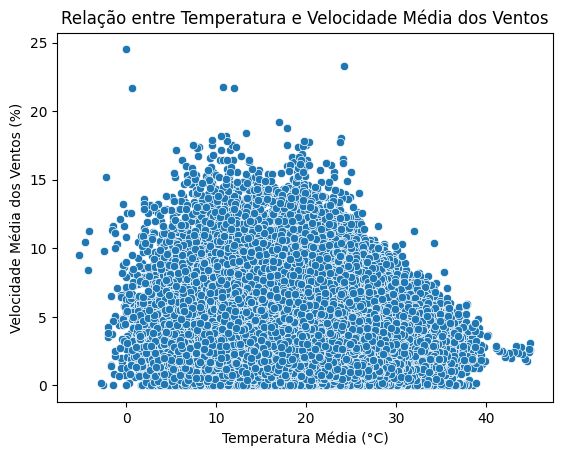

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados do CSV em um DataFrame
stations = pd.read_csv('weather_sum.csv')
# Visualização: scatter plot entre temperatura e velocidade dos ventos
sns.scatterplot(x='temp_avg', y='wind_avg', data=stations)
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Velocidade Média dos Ventos (%)')
plt.title('Relação entre Temperatura e Velocidade Média dos Ventos')
plt.show()

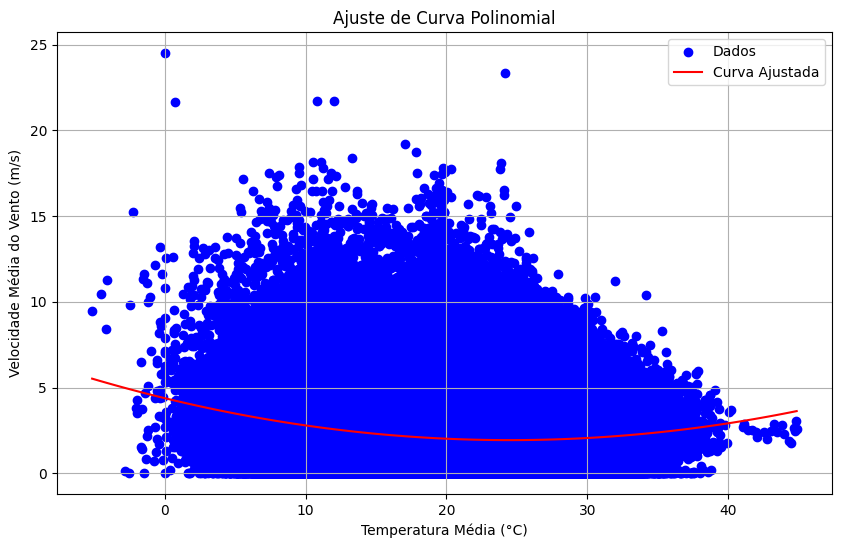

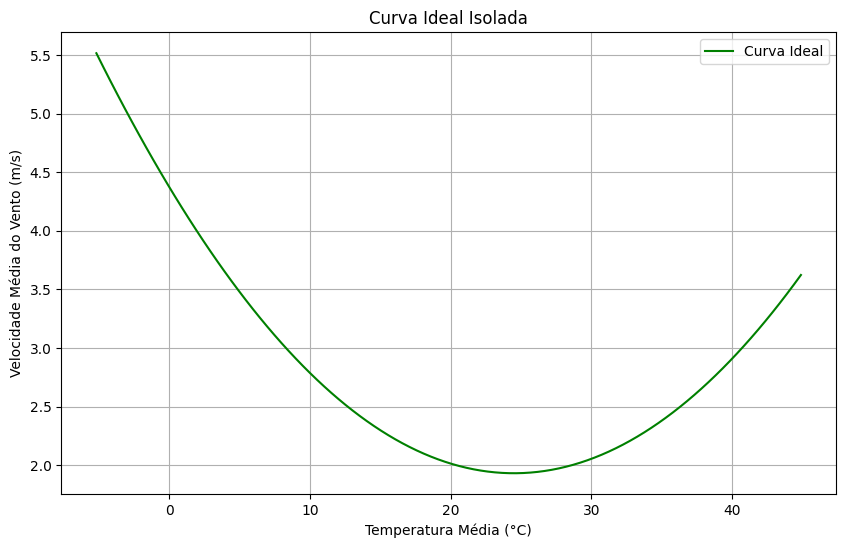

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Carregar os dados do CSV em um DataFrame
stations = pd.read_csv('weather_sum.csv')

# Definindo as variáveis a partir do DataFrame
temp_avg = stations['temp_avg'].values
wind_avg = stations['wind_avg'].values

# Definindo a função polinomial para ajuste
def funcao_polinomial(x, a, b, c):
    return a * x**2 + b * x + c

# Ajustando a curva
parametros, _ = curve_fit(funcao_polinomial, temp_avg, wind_avg)

# Gerando valores para a curva ajustada
temp_avg_ajustada = np.linspace(min(temp_avg), max(temp_avg), 100)
wind_avg_ajustada = funcao_polinomial(temp_avg_ajustada, *parametros)

# Plotando os dados e a curva ajustada
plt.figure(figsize=(10, 6))
plt.scatter(temp_avg, wind_avg, label='Dados', color='blue')
plt.plot(temp_avg_ajustada, wind_avg_ajustada, color='red', label='Curva Ajustada')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Velocidade Média do Vento (m/s)')
plt.legend()
plt.title('Ajuste de Curva Polinomial')
plt.grid(True)
plt.show()

# Plotando a curva ajustada isoladamente
plt.figure(figsize=(10, 6))
plt.plot(temp_avg_ajustada, wind_avg_ajustada, color='green', label='Curva Ideal')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Velocidade Média do Vento (m/s)')
plt.legend()
plt.title('Curva Ideal Isolada')
plt.grid(True)
plt.show()




#**Insights**

**Distribuição Geográfica:**
O gráfico de dispersão mostra a localização das estações meteorológicas com base em suas coordenadas de latitude e longitude.
Observamos que as estações estão espalhadas por diferentes regiões geográficas.
A concentração de estações parece ser maior nas regiões central e nordeste.

**Tendências Regionais:**
As estações nas regiões central e nordeste podem estar associadas a padrões climáticos específicos.
Pode haver tendências regionais, como maior precipitação em determinadas áreas ou variações sazonais distintas.

**Outliers e Anomalias:**
Verifique se há estações isoladas (outliers) que estão muito distantes das outras.
Esses outliers podem indicar áreas geograficamente únicas ou condições climáticas extremas.

**Correlações Espaciais:**
Explore se a proximidade geográfica entre as estações está relacionada a padrões climáticos semelhantes.
Por exemplo, estações próximas podem compartilhar características climáticas semelhantes devido à sua localização geográfica.

**Impacto da Latitude e Longitude:**
Considere como a latitude e a longitude afetam as condições climáticas.
Estações mais próximas do equador (latitude zero) podem ter temperaturas mais altas, enquanto estações em latitudes mais altas podem experimentar invernos rigorosos.

**Planejamento de Coleta de Dados:**

Com base na distribuição geográfica, avalie se há lacunas nas áreas de cobertura das estações.
Identifique regiões onde a coleta de dados pode ser insuficiente e planeje a instalação de novas estações.